In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
import sympy as sp
%matplotlib inline

In [4]:
rc('font', family='Comic Sans MS')
Neon = pd.read_csv("Neon.csv")
stopien = np.pi/180
minuta = stopien/60
alpha_0 = 45*stopien +30*minuta
Na_zolte = 346*stopien + 50*minuta
Na_zielone = 145*stopien+ 30*minuta
D_miarki = 2*minuta
D_obserwatora = 2*minuta
D_kat = np.sqrt(D_miarki**2+D_obserwatora**2)
AL = 176*stopien
AP = 56*stopien
kat_lamiacy = (AL - AP)/2
D_kat_lamiacy = np.sqrt(2)*D_kat/2

In [5]:
print(Neon.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  lambda[nm] &  alpha[circ] &  alpha[min] \\
\midrule
0  &         654 &          348 &          18 \\
1  &         651 &          348 &          10 \\
2  &         641 &          348 &           0 \\
3  &         614 &          347 &          46 \\
4  &         610 &          347 &          40 \\
5  &         603 &          347 &          26 \\
6  &         591 &          347 &          10 \\
7  &         588 &          347 &           0 \\
8  &         540 &          346 &          20 \\
9  &         534 &          346 &          10 \\
10 &         470 &          345 &          48 \\
11 &         454 &          344 &          44 \\
\bottomrule
\end{tabular}



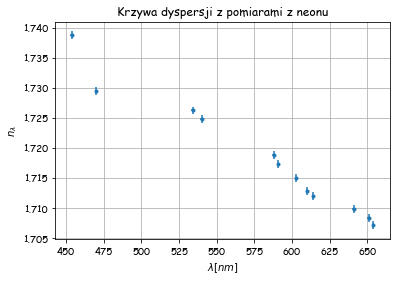

In [77]:
Neon_kat =2*np.pi-(Neon['alpha[circ]']*stopien+Neon['alpha[min]']*minuta)+alpha_0
D_neon_kat = D_kat_lamiacy
n_neon = np.sin((Neon_kat+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
plt.errorbar(Neon['lambda[nm]'],n_neon,cala_delta_n,1,'.')
plt.xlabel(r'$\lambda[nm]$'); plt.ylabel(r'$n_{\lambda}$'); plt.grid(); plt.title('Krzywa dyspersji z pomiarami z neonu')
plt.savefig('dyspersja.png')

In [41]:
zmienne = kat_lamiacy_analityczne, Neon_kat_analityczne = sp.symbols('phi, epsilon_0',real=True)
n_analitycznie = sp.sin((Neon_kat_analityczne+kat_lamiacy_analityczne)/2)/sp.sin(kat_lamiacy_analityczne/2)
pochodna_phi = n_analitycznie.diff(kat_lamiacy_analityczne).simplify()
funkcja_phi = sp.lambdify(zmienne,pochodna_phi,modules='numpy')
wklad_phi =(funkcja_phi(kat_lamiacy,Neon_kat)*D_kat_lamiacy)**2
pochodna_epsilon = n_analitycznie.diff(Neon_kat_analityczne).simplify()
funkcja_epsilon = sp.lambdify(zmienne,pochodna_epsilon,modules='numpy')
wklad_epsilon =(funkcja_epsilon(kat_lamiacy,Neon_kat)*D_neon_kat)**2
cala_delta_n = wklad_epsilon+wklad_phi
cala_delta_n **= 0.5
print(cala_delta_n)

0     0.000634
1     0.000635
2     0.000636
3     0.000637
4     0.000638
5     0.000639
6     0.000641
7     0.000642
8     0.000646
9     0.000647
10    0.000649
11    0.000655
dtype: float64


1.72029829579


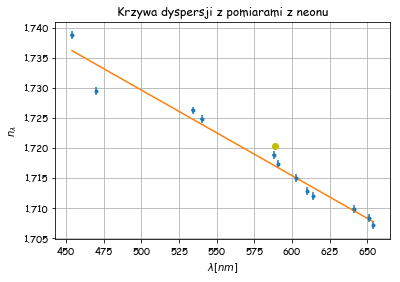

In [84]:
plt.errorbar(Neon['lambda[nm]'],n_neon,cala_delta_n,1,'.')
plt.xlabel(r'$\lambda[nm]$'); plt.ylabel(r'$n_{\lambda}$'); plt.grid(); plt.title('Krzywa dyspersji z pomiarami z neonu')
plt.savefig('dyspersja.png')
parametry1, kowariancja1 = np.polyfit(Neon['lambda[nm]'],n_neon,1,w=1/cala_delta_n,cov=True)
plt.plot(Neon['lambda[nm]'],Neon['lambda[nm]']*parametry1[0]+parametry1[1])
# parametry2, kowariancja2 = np.polyfit(Neon['lambda[nm]'],n_neon,2,w=1/cala_delta_n,cov=True)
# plt.plot(Neon['lambda[nm]'],parametry2[0]*Neon['lambda[nm]']**2+Neon['lambda[nm]']*parametry2[1]+parametry2[2])
# parametry3, kowariancja3 = np.polyfit(Neon['lambda[nm]'],n_neon,3,w=1/cala_delta_n,cov=True)
# plt.plot(Neon['lambda[nm]'],parametry3[0]*Neon['lambda[nm]']**3+parametry3[1]*Neon['lambda[nm]']**2+\
#          parametry3[2]*Neon['lambda[nm]']+parametry3[3])
n_Na_zolte = np.sin((2*np.pi-Na_zolte+alpha_0+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
D_n_Na_zolte = np.sqrt((funkcja_epsilon(kat_lamiacy,Na_zolte)*D_neon_kat)**2+(funkcja_phi(kat_lamiacy,Na_zolte)*D_kat_lamiacy)**2)
# n_Na_zielone = np.sin((Na_zielone-alpha_0+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
print(n_Na_zolte)
plt.errorbar(589,n_Na_zolte,D_n_Na_zolte,1,'yo')
plt.savefig('Prosta krzywa i punkt.png')
# plt.plot(570,n_Na_zielone,'go')